<a href="https://colab.research.google.com/github/benard3360-star/hello-world/blob/main/HR_REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the Libraries

In [ ]:
# importing Librarier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.layers import LSTM, GRU, Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [ ]:
# load the dataset
data = pd.read_csv("HR-Employee-Attrition-Data (1) (1).csv")
data.head(n=3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


### Examining the Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.shape

(1470, 35)

### Data cleaning

In [ ]:
df =data.copy()

In [ ]:
# Output the null values in the datset
# Step 3: Check for missing values
print("\nMissing values in train dataset:")
print(df.isnull().sum())



Missing values in train dataset:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsI

The dataset is clean with no null values and so further analysis is okay with the data

The dataset contains unique values in almost each column

In [ ]:
df.drop(['EmployeeCount'], axis=1, inplace =True)


In [ ]:
df.drop(['StandardHours'], axis=1, inplace =True)

### Feature Engineering


### Exploratory Data Analysis

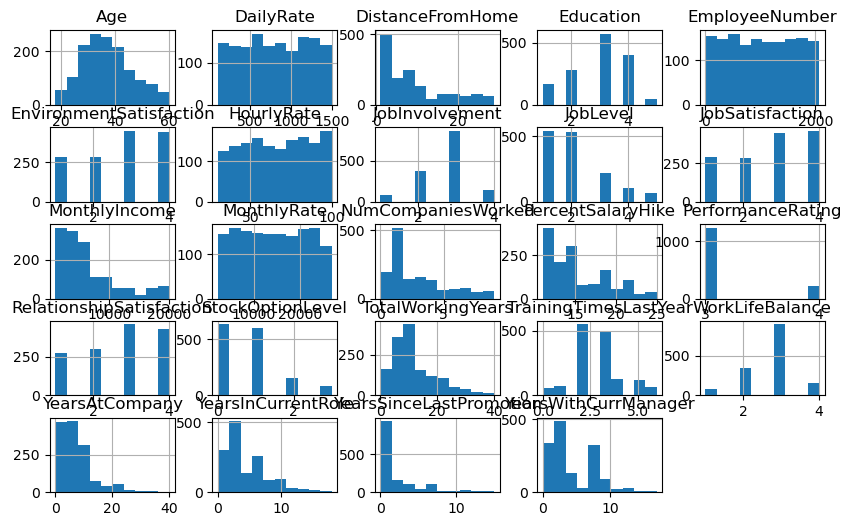

In [ ]:
# Checking for the data distribution
df.hist(figsize=(10,6))
plt.show()

In [ ]:
# Describe only the numerical values and transpose the result
numerical_description = df.select_dtypes(include=[np.number]).describe().T


In [ ]:
numerical_description

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


In [ ]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()

# Display all correlations as a string
print(correlation_matrix.to_string())

                               Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
Age                       1.000000   0.010661         -0.001686   0.208034       -0.010145                 0.010146    0.024287        0.029820  0.509604        -0.004892       0.497855     0.028051            0.299635           0.003634           0.001904                  0.053535          0.037510           0.680381              -0.019621        -0.021490        0.311309            0.212901                 0.216513              0.202089
DailyRate                 0.010661   1.000000         -0.004985  -0.016806       -0.050990                 0.01835

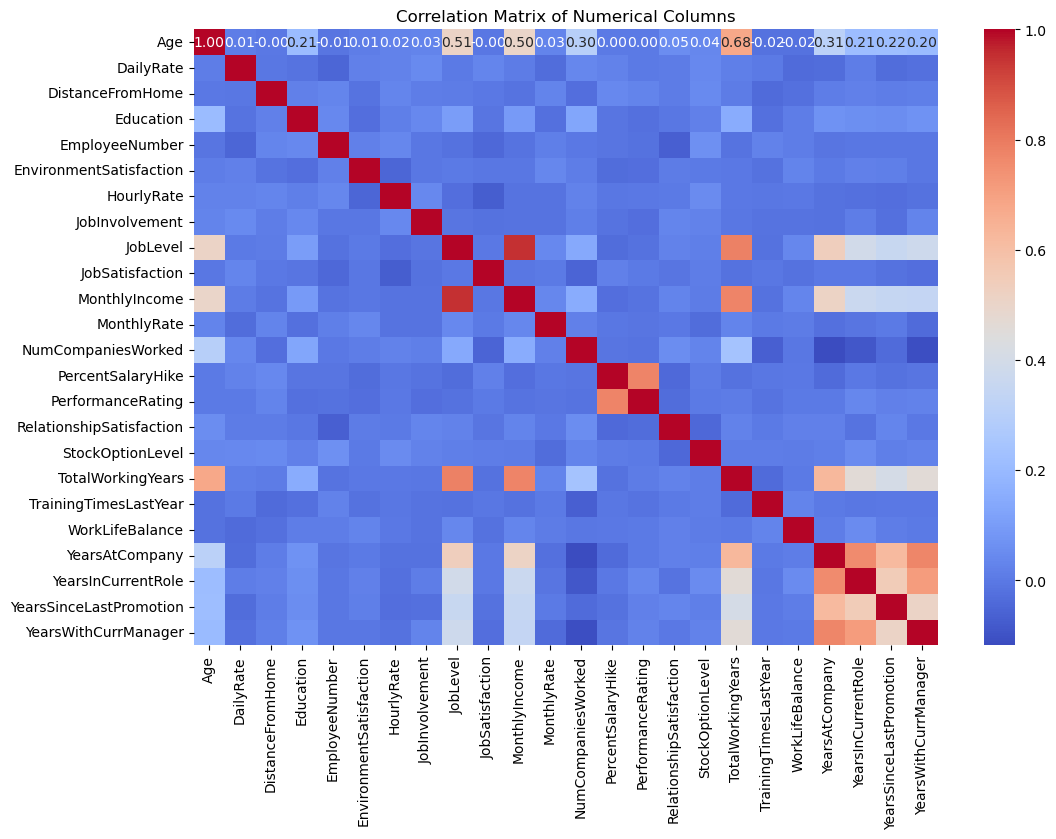

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation matrix of numerical columns
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [ ]:
df1 =df.copy()

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

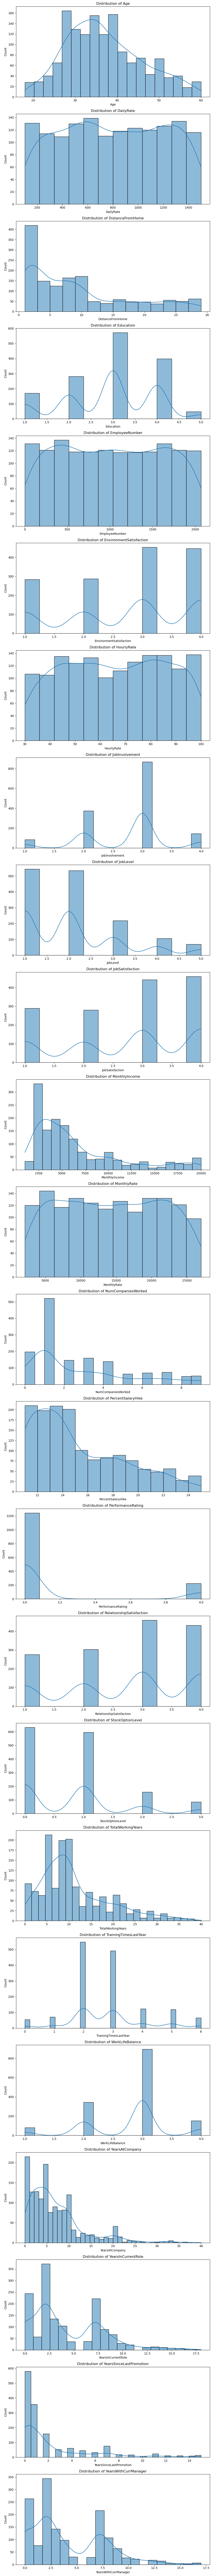

In [ ]:
# Select only numerical columns
numerical_columns = df1.select_dtypes(include=[np.number]).columns
# Set up the matplotlib figure
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 5 * len(numerical_columns)))

# Plot each numerical column
for ax, col in zip(axes, numerical_columns):
    sns.histplot(df1[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

 The Age column is normally distributed  while Distribution of MonthlyIncome, Distribution of PercentSalaryHike, Distribution of TotalWorkingYears and Distribution of YearsAtCompany are

### Apply IQR to remove the Outliers

In [ ]:
# Select only the numerical columns
numerical_columns = df1.select_dtypes(include=[np.number]).columns

# Function to remove outliers using the IQR method
def remove_outliers(df1, columns):
    for col in columns:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df1 = df1[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df1

# Remove outliers from the numerical columns
df1_cleaned = remove_outliers(df1, numerical_columns)

# Show the shape of the DataFrame before and after removing outliers
df1.shape

C:\Users\user\AppData\Local\Temp\ipykernel_13288\3692312160.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\user\AppData\Local\Temp\ipykernel_13288\3692312160.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\user\AppData\Local\Temp\ipykernel_13288\3692312160.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\user\AppData\Local\Temp\ipykernel_13288\3692312160.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
C:\Users\user\AppData\Local\Temp\ipykernel_13288\3692312160.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df[col] >= l

(1470, 33)

In [ ]:
df1_cleaned.shape

(699, 33)

Transform the numerical columns

Skipping Box-Cox transformation for constant column: PerformanceRating


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

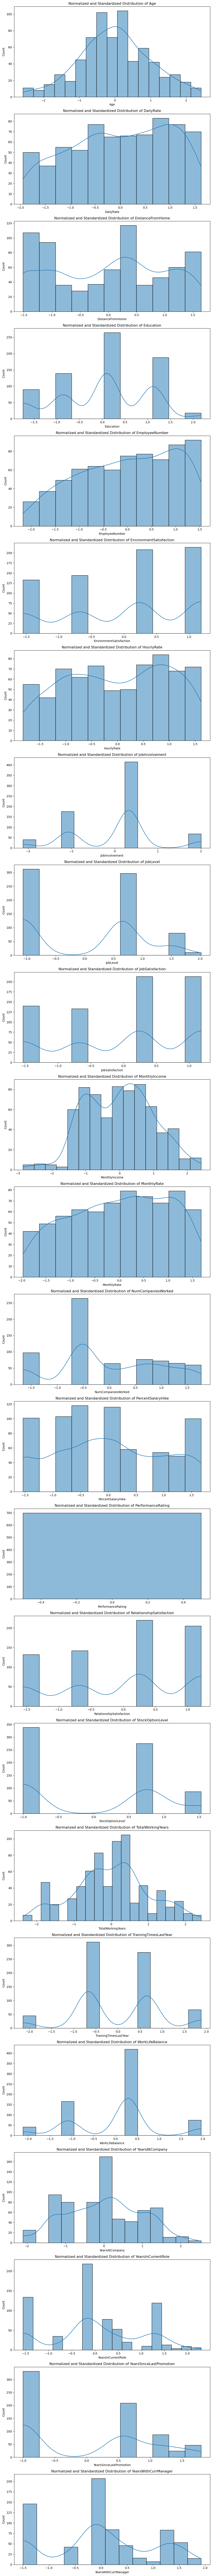

In [ ]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Box-Cox transformation and Standardization
transformed_df1 = df1_cleaned.copy()

# Transform and standardize each numerical column
for col in numerical_columns:
    if df1_cleaned[col].nunique() > 1:
        if (df1_cleaned[col] <= 0).any():
            transformed_df1[col], _ = boxcox(df1_cleaned[col] + 1 - df1_cleaned[col].min())
        else:
            transformed_df1[col], _ = boxcox(df1_cleaned[col])
    else:
        print(f"Skipping Box-Cox transformation for constant column: {col}")

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(transformed_df1[numerical_columns])
standardized_df1 = pd.DataFrame(standardized_data, columns=numerical_columns)

# Plot the distribution of each standardized column
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 5 * len(numerical_columns)))

for ax, col in zip(axes, numerical_columns):
    sns.histplot(standardized_df1[col], kde=True, ax=ax)
    ax.set_title(f'Normalized and Standardized Distribution of {col}')

plt.tight_layout()
plt.show()


In [ ]:

# Handle missing values (if any)
# In this example, we assume no missing values based on the head preview

# Encode categorical variables
df1_encoded = pd.get_dummies(df1, drop_first=True)

# Scale numerical features
from sklearn.preprocessing import StandardScaler

# Separating the features and target variable
X = df1_encoded.drop('Attrition_Yes', axis=1)
y = df1_encoded['Attrition_Yes']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


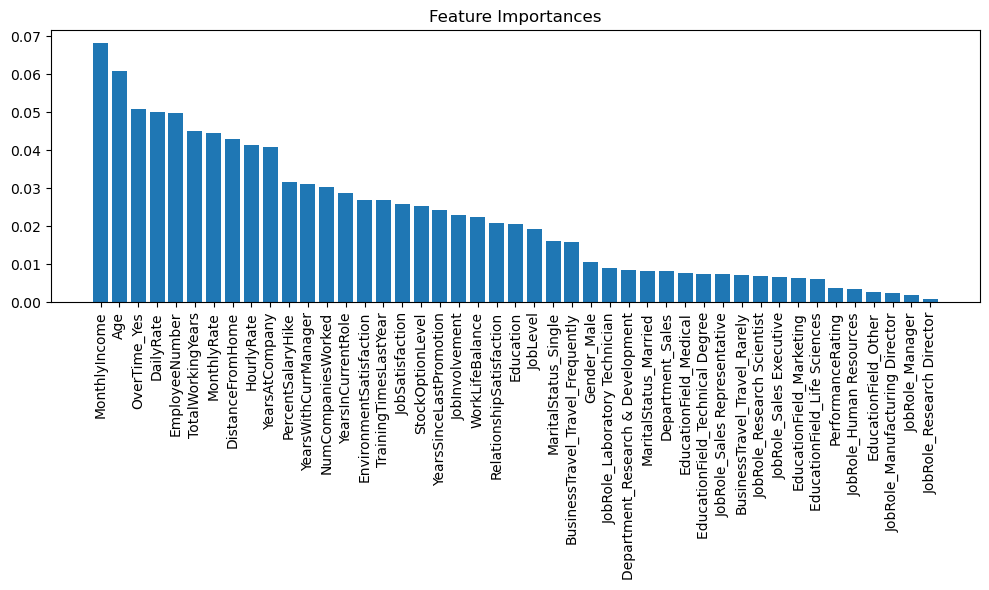

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a RandomForestClassifier to get feature importances
rf_model = RandomForestClassifier()
rf_model.fit(X_scaled, y)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


#### Relationships between Attrition and Other Key Variables

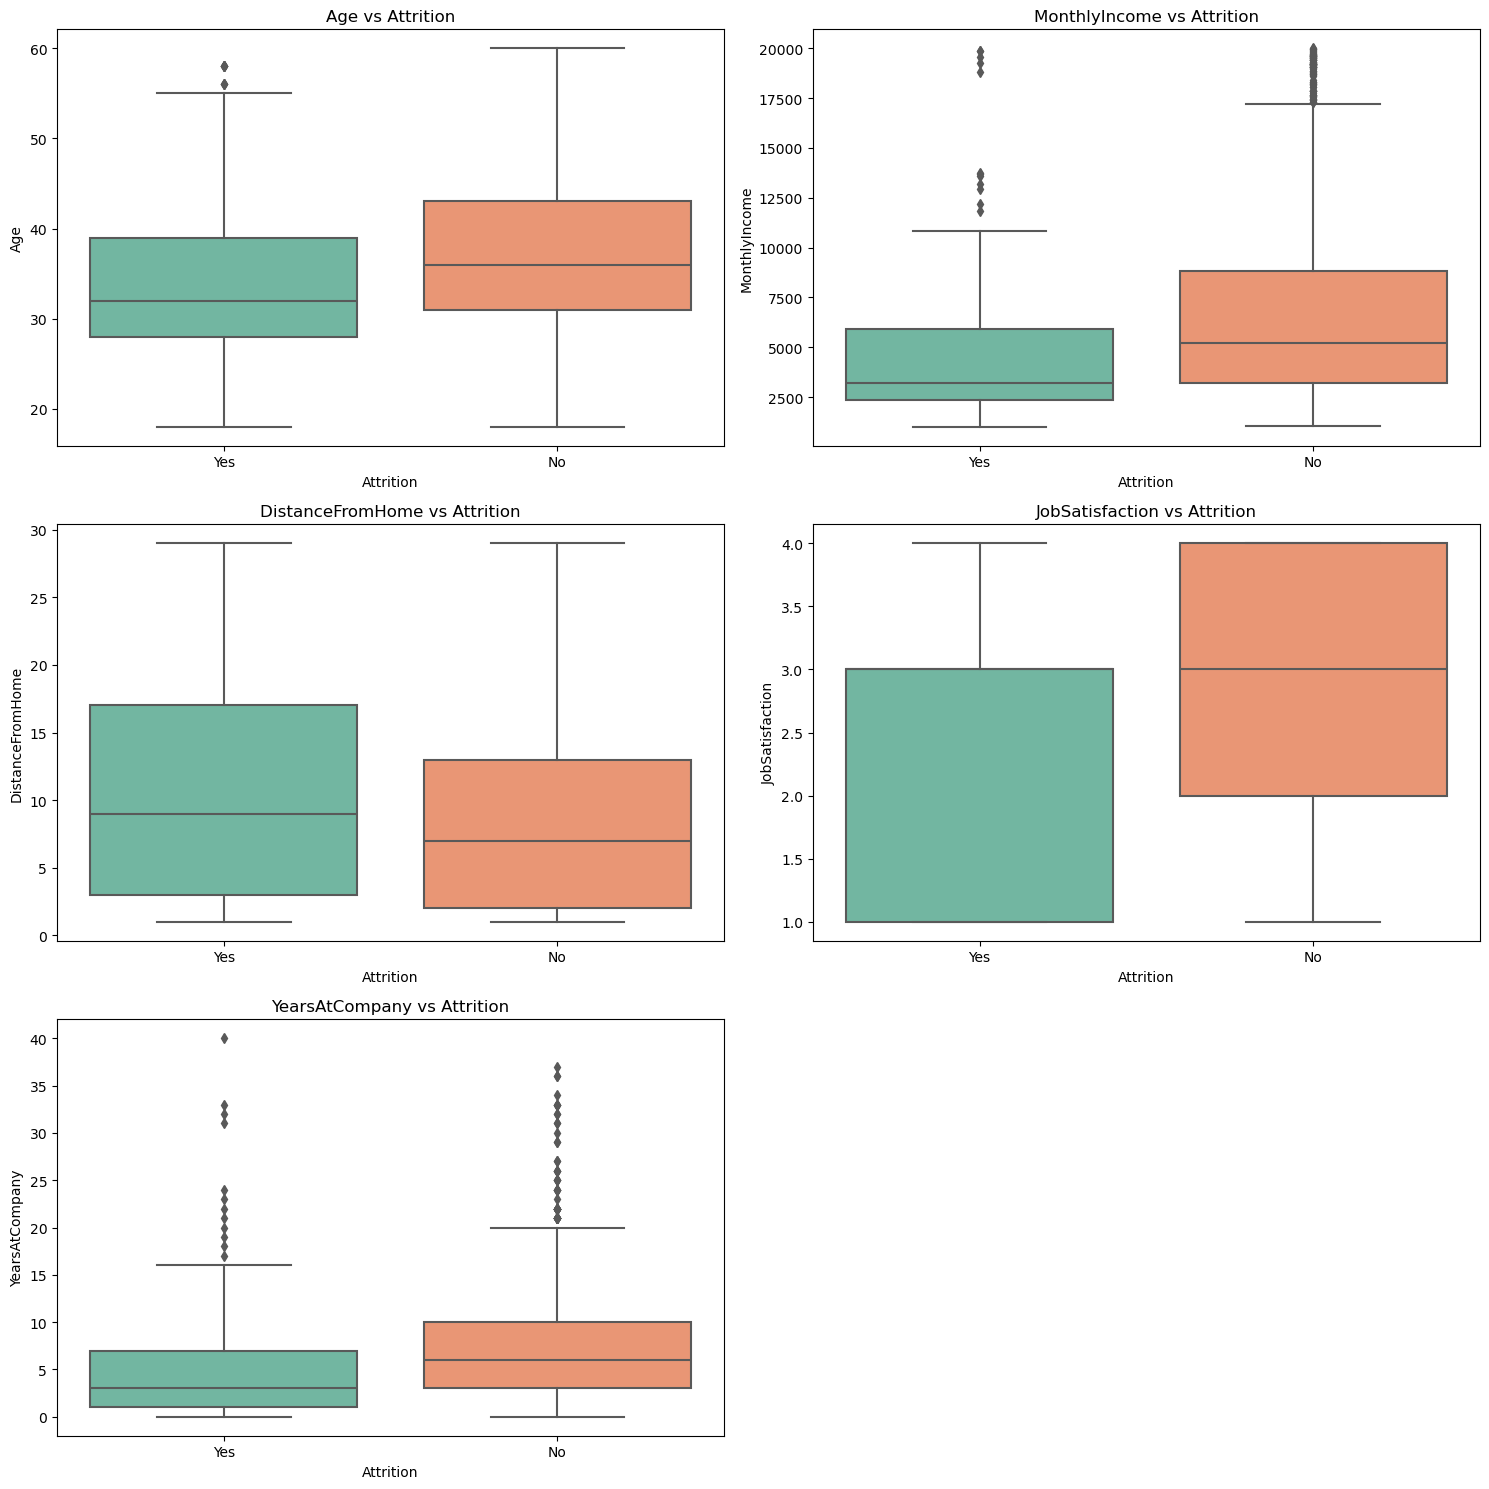

In [ ]:
key_vars = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'JobSatisfaction', 'YearsAtCompany']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
for i, var in enumerate(key_vars):
    sns.boxplot(x='Attrition', y=var, data=data, palette='Set2', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{var} vs Attrition')
axes[2, 1].axis('off')  # Hide the empty subplot

plt.tight_layout()
plt.show()


### Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    results[model_name] = {
        'classification_report': classification_report(y_test, y_pred),
        'roc_auc_score': roc_auc_score(y_test, y_pred_proba)
    }

results


{'Logistic Regression': {'classification_report': '              precision    recall  f1-score   support\n\n       False       0.92      0.95      0.93       255\n        True       0.56      0.46      0.51        39\n\n    accuracy                           0.88       294\n   macro avg       0.74      0.70      0.72       294\nweighted avg       0.87      0.88      0.88       294\n',
  'roc_auc_score': 0.7916540975364504},
 'Decision Tree': {'classification_report': '              precision    recall  f1-score   support\n\n       False       0.87      0.87      0.87       255\n        True       0.15      0.15      0.15        39\n\n    accuracy                           0.78       294\n   macro avg       0.51      0.51      0.51       294\nweighted avg       0.78      0.78      0.78       294\n',
  'roc_auc_score': 0.5122171945701357},
 'Random Forest': {'classification_report': '              precision    recall  f1-score   support\n\n       False       0.88      1.00      0.93     

In [ ]:

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(metrics['classification_report'])
    print(f"ROC-AUC Score: {metrics['roc_auc_score']:.4f}")
    print("\n")



Model: Logistic Regression
              precision    recall  f1-score   support

       False       0.92      0.95      0.93       255
        True       0.56      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.74      0.70      0.72       294
weighted avg       0.87      0.88      0.88       294

ROC-AUC Score: 0.7917


Model: Decision Tree
              precision    recall  f1-score   support

       False       0.87      0.87      0.87       255
        True       0.15      0.15      0.15        39

    accuracy                           0.78       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.78      0.78      0.78       294

ROC-AUC Score: 0.5122


Model: Random Forest
              precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro av

### Best Model Selection and Deployment

In [ ]:
# Selecting the best model based on ROC-AUC score
best_model_name = max(results, key=lambda model_name: results[model_name]['roc_auc_score'])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")

# The best model can now be saved and used for predictions
# Example: Save the model using joblib
import joblib

joblib.dump(best_model, 'best_model.pkl')


Best Model: SVM


['best_model.pkl']

### Neural Nework

In [ ]:
df2 = df1.copy()

In [ ]:
df2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
columns_to_drop = ['BusinessTravel','DailyRate',
                   'Department','DistanceFromHome', 'Education',
                   'EducationField', 'EmployeeNumber','EnvironmentSatisfaction',
                   'Gender', 'HourlyRate', 'JobInvolvement','JobLevel', 'JobRole',
                   'JobSatisfaction', 'MaritalStatus','MonthlyIncome', 'MonthlyRate',
                   'NumCompaniesWorked', 'Over18','OverTime', 'PercentSalaryHike',
                   'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel',
                   'TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance',
                   'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion']
data_cleaned = df2.drop(columns=columns_to_drop).dropna()

label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

X = data_cleaned.drop(columns=['Attrition'])
y = data_cleaned['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
# Convert categorical variables to numerical representations
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10  # Number of past observations to consider
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=50, callbacks=[early_stopping])

# Predict and evaluate LSTM model
y_pred_lstm = lstm_model.predict(X_test)
print('LSTM MSE:', mean_squared_error(y_test, y_pred_lstm))

# Define GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(SEQ_LENGTH, X_train.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

# Train GRU model
gru_model.fit(X_train, y_train, validation_split=0.2, epochs=50, callbacks=[early_stopping])

# Predict and evaluate GRU model
y_pred_gru = gru_model.predict(X_test)
print('GRU MSE:', mean_squared_error(y_test, y_pred_gru))




Epoch 1/50


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0612 - val_loss: 0.0412
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0465 - val_loss: 0.0411
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - val_loss: 0.0409
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - val_loss: 0.0412
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0482 - val_loss: 0.0410
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - val_loss: 0.0409
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - val_loss: 0.0420
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - val_loss: 0.0412
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - val_loss: 0.0415
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0458 - val_loss: 0.0411
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - val_loss: 0.0411
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
LSTM MSE: 0.042132204279374155
Epoch 1/50


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0654 - val_loss: 0.0418
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - val_loss: 0.0412
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0452 - val_loss: 0.0415
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - val_loss: 0.0414
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - val_loss: 0.0415
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
GRU MSE: 0.04262236897428536
